In [1]:
import pandas as pd

In [2]:
# 카카오톡 데이터를 불러와서 내용을 확인합니다.
data = pd.read_excel("단톡방데이터.xlsx")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3602 entries, 0 to 3601
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Time     3535 non-null   object
 1   Name     3505 non-null   object
 2   Message  3436 non-null   object
dtypes: object(3)
memory usage: 84.5+ KB
None
                Time                                               Name  \
0  2020년 5월 22일 오후 9                                                 59   
1  2020년 5월 22일 오후 9  59, 민규님이 고도환님, 진호(찐)님, 태환이님, 은규님, 성범님, 재훈님, 민곤...   
2  2020년 5월 22일 오후 9                                            59, 민규    
3  2020년 5월 22일 오후 9                                            59, 민규    
4  2020년 5월 22일 오후 9                                            59, 재훈    

            Message  
0               NaN  
1               NaN  
2          방 다시 팔껀데  
3   추가할사람들 초대해서 넣으셈  
4              생존자가  


In [3]:
# 메세지만 따로 불러옵니다.
corpus = data["Message"]
corpus

0                    NaN
1                    NaN
2               방 다시 팔껀데
3        추가할사람들 초대해서 넣으셈
4                   생존자가
              ...       
3597                지송..
3598     민규 오늘밖에 시간안되나??
3599           배 떠났다 ㅋㅋㅋ
3600             설에맞춰봐야지
3601       ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
Name: Message, Length: 3602, dtype: object

In [4]:
# 데이터 전처리를 위한 전체 데이터의 특징을 빈도분석으로 파악해봅니다.
import nltk

total_tokens = [token for msg in corpus for token in str(msg).split()]
print(len(total_tokens))

7065


In [5]:
text = nltk.Text(total_tokens, name='kakao')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

4155
[('nan', 166), ('이모티콘', 96), ('난', 64), ('나', 53), ('민규', 51), ('아', 47), ('ㅇㅇ', 47), ('은규', 46), ('ㅇㅋ', 39), ('근데', 37)]


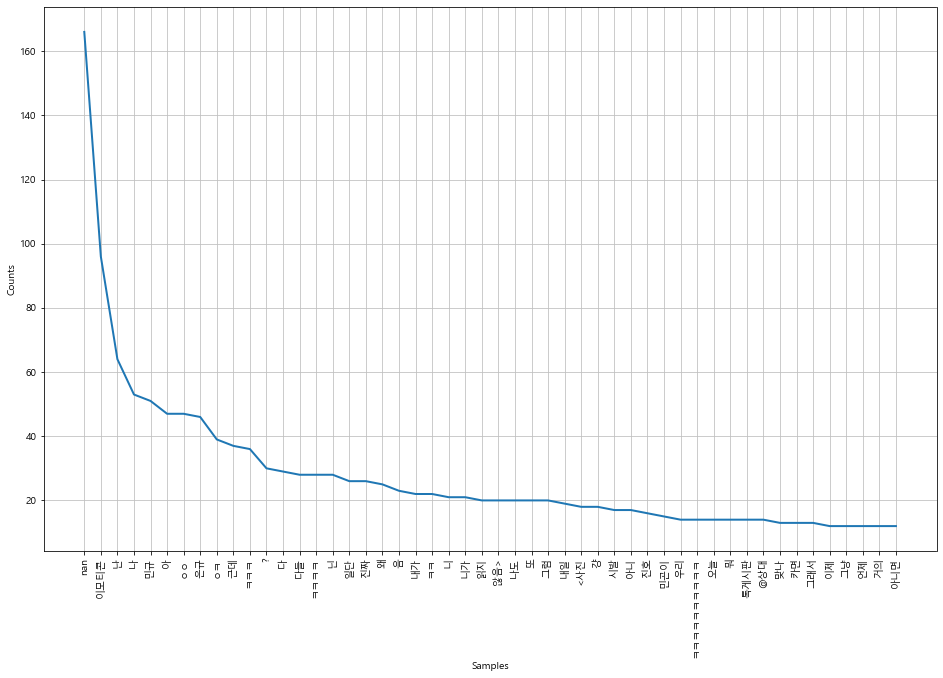

In [6]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

In [7]:
import re
from konlpy.tag import Mecab
mecab = Mecab(r"C:/mecab/mecab-ko-dic")
def message_cleaning(docs):

    """
        1. Photo, Emoticon은 그 내용을 알 수 없으므로 제거.
        
        2. 자음/모음 표현 처리방법.
        
            1) "ㅇㅇ" ,"ㅋㅋㅋㅋㅋ" 같은 자음만 존재하는 표현이나, "ㅡㅡ", "ㅠㅠ" 같은 모음만 존재하는 표현들은
            의미는 있으나 중요한 의미를 가지고 있지 않다고 판단하여 제거.
            
            2) 이러한 표현들도 전부 emoticon 같은 감정 표현의 의성어로 쓰거나, 단축 표현이므로 제거하지 않음. 
            
        3. http:// 로 시작하는 hyperlink 제거.
        
        4. 특수문자 제거.
    
    """
    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in corpus]
    
    # 1
    pattern1 = re.compile("nan|이모티콘")
    docs = [pattern1.sub("",doc) for doc in docs]

    # 2
    pattern2 = re.compile("[ㄱ-ㅎ]*|[ㅏ-ㅓ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # 3
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 4
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]


    return docs

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding="utf-8") as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [8]:
SW = define_stopwords("stopwords-ko.txt")
# 카카오톡 텍스트를 정제합니다.
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

3602
['', '', ' 방 다시 팔껀데', ' 추가할사람들 초대해서 넣으셈', ' 생존자가', ' 글타고 봐야지', ' 태균이 없네', ' 상대도없고', ' 넣을인간들 넣어', ' 이제 또나가면']


In [9]:
# 정제되어 지워지는 텍스트들을 확인하고 지워줍니다.
cleaned_text = pd.Series(cleaned_corpus)
data["Message"] = cleaned_text
cleaned_data = data[data["Message"] != ""]
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3436 entries, 2 to 3601
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Time     3436 non-null   object
 1   Name     3436 non-null   object
 2   Message  3436 non-null   object
dtypes: object(3)
memory usage: 107.4+ KB


In [10]:
#결과를 확인합니다.
cleaned_data.head()

,Time,Name,Message
2,2020년 5월 22일 오후 9,"59, 민규",방 다시 팔껀데
3,2020년 5월 22일 오후 9,"59, 민규",추가할사람들 초대해서 넣으셈
4,2020년 5월 22일 오후 9,"59, 재훈",생존자가
5,2020년 5월 22일 오후 10,"00, 민규",글타고 봐야지
6,2020년 5월 22일 오후 10,"00, 태환이",태균이 없네


In [11]:
# 정제한 카카오톡 데이터를 저장합니다.

import pickle

with open("cleaned_data.pk","wb") as f:
    pickle.dump(cleaned_data,f)